In [2]:
%load_ext autoreload
%autoreload 2
import logging

logging.getLogger('mat73').setLevel(logging.CRITICAL)
import os
import re
from scipy.io import loadmat
import mat73
logging.getLogger('mat73').setLevel(logging.CRITICAL)

import warnings

from collections import Counter
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from utils import *
from connectivity_dynamics import *
from eibal import *

# Exploring the Structs with PDC Welch 
Here we will use the pre-computed spectral decompositions to plot the frequency range that most tracks E/I balance.
    According to the Voytek group this is the 30-50Hz range
    

In [3]:
DATA_DIR = '/mnt/ernie_main/Ghassan/ephys/data/connectivity'
SUB_DIR = 'Epat31'
sub_structs = glob.glob(os.path.join(DATA_DIR, SUB_DIR, "*.mat"))
sub_obj = load_mat(sub_structs[0])

In [4]:

spectral_keys =[ 'pwelch_ictal',
                'pwelch_interictal',
                'pwelch_post',
                'pwelch_pre']
# spectral_dfs = []

# freqs = sub_obj['pdc']['seizure']['pwelch_freqs']
# for key in spectral_keys:
#     decomps = sub_obj['pdc']['seizure'][key]
#     avg_decomp = np.mean(decomps, axis=0)
#     df = pd.DataFrame()
#     df['freq'] = freqs
#     df['welch'] = np.log(avg_decomp)
#     df['period'] = key
#     spectral_dfs.append(df)
# spectral_dfs = pd.concat(spectral_dfs)

In [5]:
spectral_dfs = gen_global_peri_psd(sub_obj,spectral_keys)

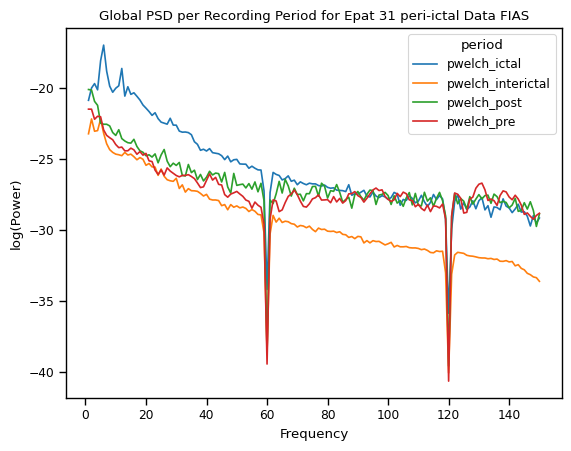

In [6]:
with sns.plotting_context("paper"):
    sns.lineplot(spectral_dfs, x="freq", y='power', hue='period')
    plt.title("Global PSD per Recording Period for Epat 31 peri-ictal Data FIAS")
    plt.xlabel("Frequency")
    plt.ylabel("log(Power)")
    plt.savefig("../viz/global_psd_Epat31_FIAS.svg",transparent=True)


In [12]:
for period in set(spectral_dfs.period):
    df = spectral_dfs[spectral_dfs.period == period]
    freqs = df.freq.values.reshape(-1,1)
    power = df.power.values.reshape(-1,1)
    slope = get_ei_slope(freqs, power)
    print(f"Period: {period} \nSlope: {slope}\n")

Period: pwelch_post 
Slope: [[-0.04893525]]

Period: pwelch_pre 
Slope: [[-0.07227378]]

Period: pwelch_interictal 
Slope: [[-0.08654742]]

Period: pwelch_ictal 
Slope: [[-0.12455642]]



(150, 1)

In [ ]:
np.logica